<a href="https://colab.research.google.com/github/Debojyoti-Gho/advanced-student-attendance-system-/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
# -- STEP 0: System setup in one cell --
echo "Installing Segment Anything + CLIP + dependencies..."

# Install Segment Anything (direct from GitHub)
pip install git+https://github.com/facebookresearch/segment-anything.git@main --quiet

# Install CLIP (openai/CLIP) + Pillow, PyTorch, etc.
pip install git+https://github.com/openai/CLIP.git --quiet
pip install opencv-python matplotlib pillow torchvision tqdm ftfy --quiet

# Download SAM ViT-H model weights (~2.5GB).
# If you get a quota error from the direct link, you can download from a mirror or your own hosting.
wget -q --show-progress https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

echo "Setup complete!"


Installing Segment Anything + CLIP + dependencies...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.8 MB/s eta 0:00:00
Setup complete!



     0K .......... .......... .......... .......... ..........  0% 6.64M 6m8s
    50K .......... .......... .......... .......... ..........  0% 6.84M 6m3s
   100K .......... .......... .......... .......... ..........  0% 12.7M 5m6s
   150K .......... .......... .......... .......... ..........  0% 21.4M 4m18s
   200K .......... .......... .......... .......... ..........  0% 24.2M 3m47s
   250K .......... .......... .......... .......... ..........  0% 22.2M 3m27s
   300K .......... .......... .......... .......... ..........  0% 34.1M 3m8s
   350K .......... .......... .......... .......... ..........  0% 50.0M 2m51s
   400K .......... .......... .......... .......... ..........  0% 37.0M 2m39s
   450K .......... .......... .......... .......... ..........  0% 46.8M 2m28s
   500K .......... .......... .......... .......... ..........  0% 51.3M 2m19s
   550K .......... .......... .......... .......... ..........  0% 52.5M 2m11s
   600K .......... .......... .......... .......... ...

/usr/local/lib/python3.11/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)
100%|████████████████████

Please upload your image now...


Saving plastic-bottles-and-bags-pollution-in-the-pond-video.jpg to plastic-bottles-and-bags-pollution-in-the-pond-video.jpg
Generating segmentation masks with SAM (this may take a while)...
Found 174 segmented regions.


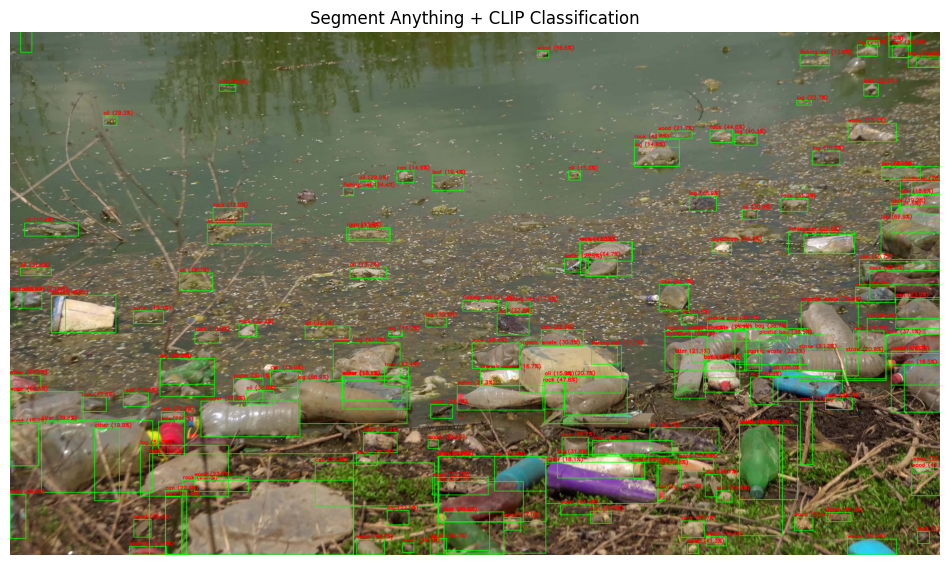


=== Classification Results ===
[95.8%] -> leaf at bbox (1792.0,1982.0,1980,2141)
[94.6%] -> bottle at bbox (3011.0,1623.0,3189,2080)
[86.9%] -> leaf at bbox (1791.0,1982.0,2039,2159)
[82.7%] -> rock at bbox (2680.0,1044.0,2802,1153)
[78.8%] -> organic waste at bbox (3266.0,1116.0,3502,1421)
[77.1%] -> bottle at bbox (3012.0,1624.0,3251,1931)
[70.1%] -> clothing at bbox (2672.0,1888.0,2705,1935)
[69.9%] -> log at bbox (3596.0,777.0,3839,951)
[65.4%] -> wood at bbox (511.0,2013.0,582,2086)
[64.7%] -> rock at bbox (2377.0,932.0,2508,1011)

Done! This approach uses SAM to segment all regions, then CLIP to label them.


In [2]:
# -- STEP 1: Imports & Setup (Python side) --
import torch
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
from PIL import Image

# CLIP
import clip
import torch.nn.functional as F

# Segment Anything
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

import os

# Load SAM model (ViT-H variant)
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Downloaded in previous cell
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to("cuda")  # Use GPU if available

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_batch=32,  # Increase for more thorough segmentation
)

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-L/14", device=device)  # Larger CLIP model

# Define a broad set of possible labels for open-set classification
# You can add or remove items as you wish
LABELS = [
    "bottle", "plastic bag", "wood", "leaf", "water", "trash", "pollution", "oil", "can",
    "paper", "organic waste", "driftwood", "metal", "litter", "garbage", "food waste",
    "styrofoam", "clothing", "fishing net", "cup", "straw", "log", "rock", "wrapper", "other"
]

def classify_clip(crop_pil):
    """Classify a PIL crop using CLIP against a predefined set of LABELS."""
    # Preprocess for CLIP
    image_input = clip_preprocess(crop_pil).unsqueeze(0).to(device)
    # Encode text & image
    text_tokens = clip.tokenize(LABELS).to(device)
    with torch.no_grad():
        image_features = clip_model.encode_image(image_input)
        text_features = clip_model.encode_text(text_tokens)
    # Normalize
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    # Compute similarity
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    # Top match
    top_prob, top_label_id = similarity[0].max(dim=0)
    return LABELS[top_label_id], float(top_prob.item())

def overlay_mask(image, mask, color, alpha=0.5):
    """Overlay a segmentation mask on the image for visualization."""
    overlay = image.copy()
    overlay[mask != 0] = color
    return cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)

# -- STEP 2: Upload an Image
print("Please upload your image now...")
from google.colab import files
uploaded = files.upload()
img_name = list(uploaded.keys())[0]

# Load the image with OpenCV for display, also keep a PIL copy
original_cv = cv2.imread(img_name)
original_cv = cv2.cvtColor(original_cv, cv2.COLOR_BGR2RGB)
original_pil = Image.open(img_name).convert("RGB")

# -- STEP 3: Generate Masks with Segment Anything
print("Generating segmentation masks with SAM (this may take a while)...")
masks = mask_generator.generate(original_cv)

print(f"Found {len(masks)} segmented regions.")

# -- STEP 4: For each mask, find bounding box, crop, classify with CLIP
output_vis = original_cv.copy()
results_info = []

for i, mask_info in enumerate(masks):
    mask = mask_info["segmentation"]
    # Convert mask to bounding box
    x, y, w, h = mask_info["bbox"]  # [x, y, width, height]
    x2, y2 = int(x + w), int(y + h)

    # Crop region from PIL image for classification
    cropped_pil = original_pil.crop((x, y, x2, y2))

    # Classify with CLIP
    label, prob = classify_clip(cropped_pil)

    # Save results
    results_info.append((x, y, x2, y2, label, prob))

# -- STEP 5: Visualize All BBoxes + Labels on the Original
for (x, y, x2, y2, label, prob) in results_info:
    cv2.rectangle(output_vis, (int(x), int(y)), (int(x2), int(y2)), (0,255,0), 2)
    text_str = f"{label} ({prob*100:.1f}%)"
    cv2.putText(output_vis, text_str, (int(x), int(y)-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)

# -- STEP 6: Display Results
plt.figure(figsize=(12, 8))
plt.imshow(output_vis)
plt.axis("off")
plt.title("Segment Anything + CLIP Classification")
plt.show()

# Print top segments
print("\n=== Classification Results ===")
for (x, y, x2, y2, label, prob) in sorted(results_info, key=lambda x: -x[-1])[:10]:
    print(f"[{prob*100:.1f}%] -> {label} at bbox ({x},{y},{x2},{y2})")

print("\nDone! This approach uses SAM to segment all regions, then CLIP to label them.")


In [3]:
# -- STEP 6: Creative Narrative Generation --
# Pick the top 5 labels by confidence to describe the scene
top_labels_sorted = sorted(results_info, key=lambda x: -x[-1])
top_labels = [label for (_, _, _, _, label, _) in top_labels_sorted[:5]]

# Formulate a creative prompt based on the detected objects
prompt = f"In a surreal scene, I witness a convergence of {', '.join(top_labels)}. The ambience is enigmatic and full of untold stories because"
print("\nPrompt for narrative generation:")
print(prompt)

# Initialize a text-generation pipeline using GPT-2
from transformers import pipeline
text_generator = pipeline("text-generation", model="gpt2", device=0 if torch.cuda.is_available() else -1)

# Generate a creative narrative (adjust max_length as desired)
generated_output = text_generator(prompt, max_length=100, num_return_sequences=1)[0]['generated_text']
print("\n=== Generated Narrative Description ===")
print(generated_output)



Prompt for narrative generation:
In a surreal scene, I witness a convergence of leaf, bottle, leaf, rock, organic waste. The ambience is enigmatic and full of untold stories because


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



=== Generated Narrative Description ===
In a surreal scene, I witness a convergence of leaf, bottle, leaf, rock, organic waste. The ambience is enigmatic and full of untold stories because of the small amount of food in a leafy garden. This moment of clarity has a direct relationship to the events of the day." - The Village Voice. (click to enlarge)

One of the largest and most recognizable aspects of what is going on among food and animal activists is that this activity is taking place in the context of
